In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
xk = np.arange(1,10)
pk = np.log10(1+1/np.arange(1,10))
bennf = stats.rv_discrete(name='benf', values=(xk, pk))

In [3]:
R = bennf.rvs(size=300)

In [4]:
res = stats.relfreq(R, numbins=9)
res

RelfreqResult(frequency=array([0.29333333, 0.19      , 0.13      , 0.11333333, 0.06333333,
       0.07      , 0.04333333, 0.04666667, 0.05      ]), lowerlimit=0.5, binsize=1.0, extrapoints=0)

# 1.1 Беннфорд для населения стран

In [89]:
df = pd.read_csv('population.csv')

In [90]:
df = df.loc[:,'Population (2020)']

In [91]:
data = df.to_numpy()
data = np.array([int(str(abs(x))[0]) for x in data])
data

array([1, 1, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 9, 9, 8, 8, 8, 6, 6, 6,
       6, 6, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 7, 7, 7, 6, 6, 6, 6,
       6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 3,
       3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 9, 8, 8, 8, 7, 7, 6, 6, 6, 6, 5, 5, 5, 5, 4, 4, 4,
       3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 9, 9, 8, 7, 7, 6, 6, 5, 5, 5, 5, 5, 4, 4, 3, 3, 3, 3, 3, 3, 3,
       2, 1, 1, 1, 1, 1, 1, 9, 6, 5, 4, 3, 1, 1, 8])

In [92]:
bennford = np.log10(1+1/np.arange(1,10))

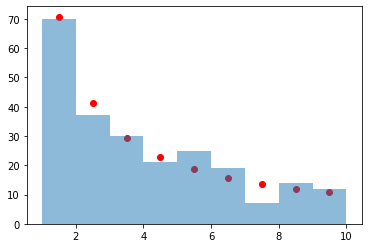

In [93]:
plt.hist(data, bins=[1,2,3,4,5,6,7,8,9,10], alpha = 0.5)
plt.scatter(np.arange(1,10)+0.5,bennford*len(data), c='r')
plt.show()

In [94]:
freq = bennf.rvs(size=len(data))
freq = np.array([np.count_nonzero(freq==i) for i in range(1,10)])
freq

array([73, 45, 27, 18, 24, 17, 14,  7, 10])

In [95]:
ans = stats.chisquare(np.array([np.count_nonzero(data==i) for i in range(1,10)]), freq)
ans

Power_divergenceResult(statistic=13.55580401110216, pvalue=0.09410348569647599)

# 1.2 Беннфорд для чисел Фиббоначи

In [96]:
from functools import reduce
fib = lambda n:reduce(lambda x,n:[x[1],x[0]+x[1]], range(n),[0,1])[0]

In [102]:
data = np.array([fib(i) for i in range(1,301)])
data = np.array([int(str(abs(x))[0]) for x in data])

In [103]:
bennford = np.log10(1+1/np.arange(1,10))
bennford

array([0.30103   , 0.17609126, 0.12493874, 0.09691001, 0.07918125,
       0.06694679, 0.05799195, 0.05115252, 0.04575749])

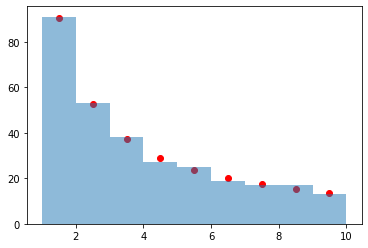

In [104]:
plt.hist(data, bins=[1,2,3,4,5,6,7,8,9,10], alpha = 0.5)
plt.scatter(np.arange(1,10)+0.5,bennford*len(data), c='r')
plt.show()

In [108]:
freq = np.around(np.log10(1+1/np.arange(1,10))*len(data))
freq

array([90., 53., 37., 29., 24., 20., 17., 15., 14.])

In [109]:
ans = stats.chisquare(np.array([np.count_nonzero(data==i) for i in range(1,10)]), freq)
ans

Power_divergenceResult(statistic=0.6058310773828015, pvalue=0.9997243411554438)

# 1.3 Беннфорд для количества проданной авакады

In [117]:
df = pd.read_csv('avocado.csv')

In [118]:
df = df.loc[:,'Total Volume']

In [119]:
data = df.to_numpy()
data = np.array([int(str(abs(x))[0]) for x in data])
np.unique(data)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [120]:
bennford = np.log10(1+1/np.arange(1,10))

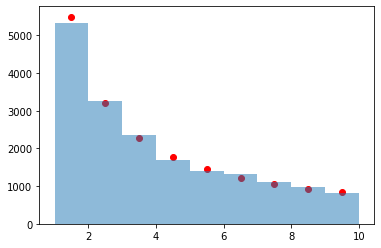

In [121]:
plt.hist(data, bins=[1,2,3,4,5,6,7,8,9,10], alpha = 0.5)
plt.scatter(np.arange(1,10)+0.5,bennford*len(data), c='r')
plt.show()

In [122]:
freq = np.around(np.log10(1+1/np.arange(1,10))*len(data))
freq

array([5493., 3213., 2280., 1769., 1445., 1222., 1058.,  933.,  835.])

In [123]:
ans = stats.chisquare(np.array([np.count_nonzero(data==i) for i in range(1,10)]), freq)
ans

Power_divergenceResult(statistic=22.438551804429437, pvalue=0.004165062086997966)

In [124]:
data = np.random.randint(1,10,3000)

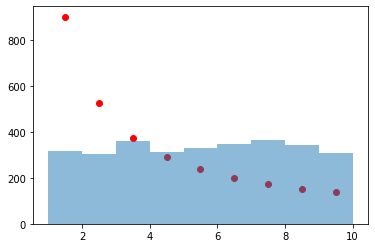

In [125]:
plt.hist(data, bins=[1,2,3,4,5,6,7,8,9,10], alpha = 0.5)
plt.scatter(np.arange(1,10)+0.5,bennford*len(data), c='r')
plt.show()

In [126]:
freq = np.around(np.log10(1+1/np.arange(1,10))*len(data))
freq

array([903., 528., 375., 291., 238., 201., 174., 153., 137.])

In [127]:
ans = stats.chisquare(np.array([np.count_nonzero(data==i) for i in range(1,10)]), freq)
ans

Power_divergenceResult(statistic=1283.3930005775273, pvalue=9.133149784103021e-272)